In [ ]:
"""DATA PREPARATION"""

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas_datareader as pdr
from pandas_datareader.data import DataReader
import warnings
from datetime import datetime
import yfinance as yf
o_empty_series = pd.Series()
warnings.filterwarnings("ignore")

In [13]:
# Set the end date to today
end_date = datetime.now().date()

# Set the start date to one year ago
start_date = end_date.replace(year=end_date.year - 1)

In [3]:
# Define the list of Indian stock symbols (NSE or BSE)
stock_symbols = ["TATAMOTORS.NS", "TATASTEEL.NS", "HDFCBANK.NS", "INFY.NS"]

# Define the corresponding company names
company_names = ["Tata Motors", "Tata Steel", "HDFC Bank", "Infosys"]

# Create an empty DataFrame to store the stock data
stock_data = pd.DataFrame()

# Fetch and store data for each stock
for symbol in stock_symbols:
    stock = yf.download(symbol, start=start_date, end=end_date)
    stock_data[symbol] = stock["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# Print the first few rows of the stock data
print(stock_data.head())

            TATAMOTORS.NS  TATASTEEL.NS  HDFCBANK.NS      INFY.NS
Date                                                             
2023-02-06     440.626709    113.737793  1633.022705  1508.935791
2023-02-07     434.097076    107.927437  1635.444824  1501.774902
2023-02-08     438.732605    107.927437  1635.247192  1528.784546
2023-02-09     435.393005    107.733757  1631.836304  1554.256348
2023-02-10     444.464752    105.361198  1638.312012  1546.134155


In [5]:
# Create an empty list to store DataFrames for each stock
stock_dfs = []

# Fetch and store data for each stock
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    stock_data = stock.history(start=start_date, end=end_date)
    stock_data["Company"] = symbol  # Add a new column with the company's symbol
    stock_dfs.append(stock_data)

# Concatenate the DataFrames into a single DataFrame
data = pd.concat(stock_dfs, axis=0)

# Print the last few rows of the data
print(data.tail())

                                  Open         High          Low        Close  \
Date                                                                            
2024-01-29 00:00:00+05:30  1665.150024  1679.349976  1647.599976  1656.599976   
2024-01-30 00:00:00+05:30  1662.449951  1690.000000  1648.250000  1651.449951   
2024-01-31 00:00:00+05:30  1648.250000  1667.250000  1638.099976  1660.900024   
2024-02-01 00:00:00+05:30  1659.550049  1677.000000  1650.349976  1657.050049   
2024-02-02 00:00:00+05:30  1666.050049  1718.500000  1665.000000  1693.349976   

                            Volume  Dividends  Stock Splits  Company  
Date                                                                  
2024-01-29 00:00:00+05:30  4253785        0.0           0.0  INFY.NS  
2024-01-30 00:00:00+05:30  4995943        0.0           0.0  INFY.NS  
2024-01-31 00:00:00+05:30  6763779        0.0           0.0  INFY.NS  
2024-02-01 00:00:00+05:30  5760011        0.0           0.0  INFY.NS  
2024-0

In [6]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,980.000000,980.000000,980.000000,980.000000,9.800000e+02,980.000000,980.0
mean,929.201841,936.296679,921.293758,928.624929,1.780100e+07,0.079184,0.0
std,607.324314,611.436032,602.910847,607.062900,1.568327e+07,1.156019,0.0
min,99.260315,99.841349,98.340343,98.872955,0.000000e+00,0.000000,0.0
25%,335.389170,342.305698,334.166861,335.226677,7.147325e+06,0.000000,0.0
50%,1039.189957,1041.211419,1008.078706,1030.064484,1.238388e+07,0.000000,0.0
75%,1523.012512,1534.165850,1512.024994,1522.458466,2.358596e+07,0.000000,0.0
max,1723.449951,1757.500000,1713.800049,1728.199951,1.171753e+08,19.000000,0.0


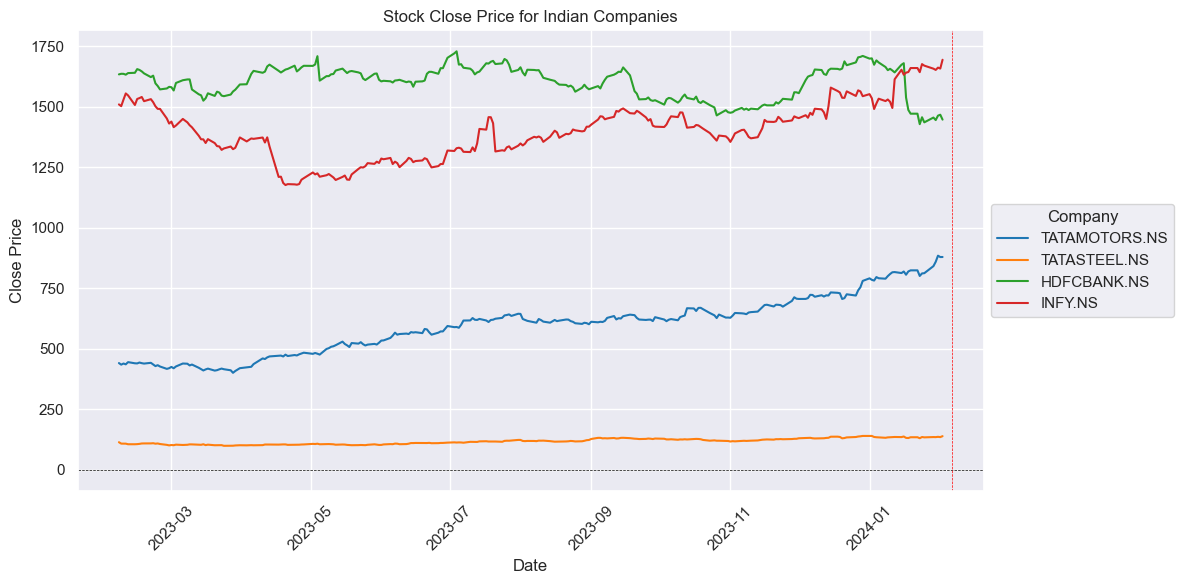

In [7]:
# Set the style for the plot
sns.set(style="darkgrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the close prices for each company
ax = sns.lineplot(
    x=data.index,
    y="Close",
    data=data,
    hue="Company",
    palette="tab10"
)

# Set titles and labels
ax.set(
    title="Stock Close Price for Indian Companies",
    xlabel="Date",
    ylabel="Close Price"
)

# Display the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Company')

# Rotate x-axis labels
plt.xticks(rotation=45)

# grid lines
ax.grid(True)
# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

# horizontal line at y=0 for reference
plt.axvline(end_date, color='red', linestyle='--', linewidth=0.5, label='Today')

# plot
plt.tight_layout()
plt.show()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')


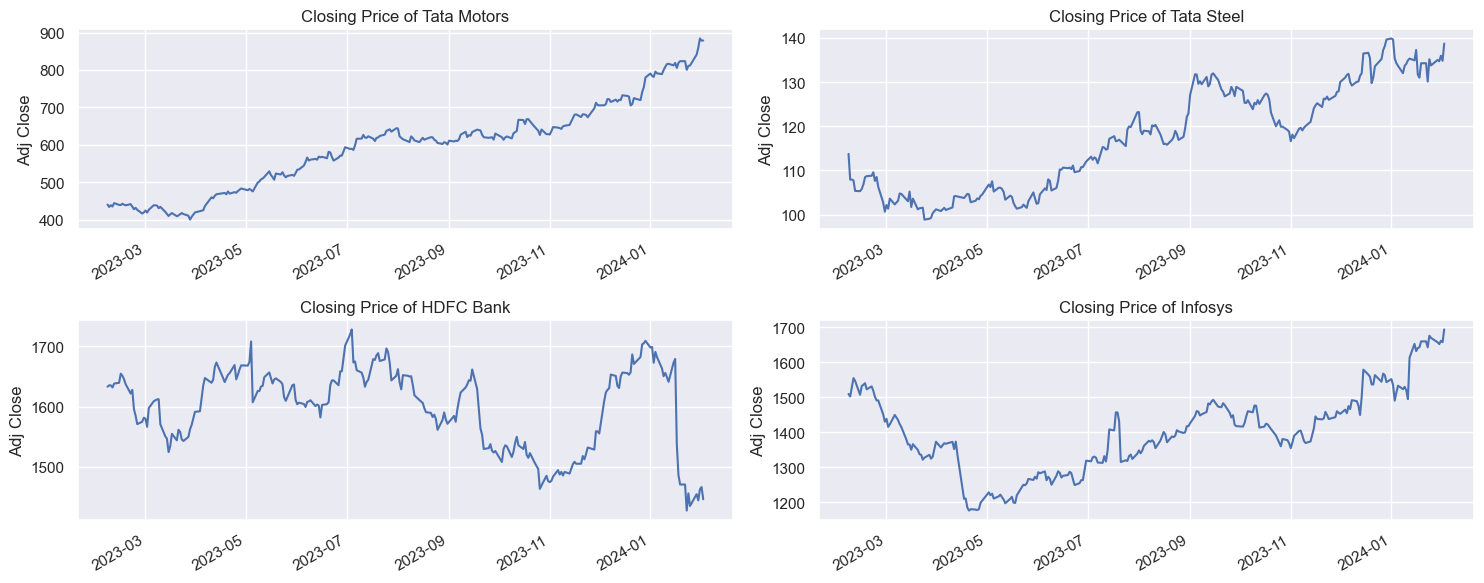

In [8]:
# Create subplots
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):

    print(stock_df.columns)

    # Update the column name based on the actual column name
    column_name = "Close"

    stock_df[column_name].plot(ax=ax)
    ax.set_ylabel("Adj Close")
    ax.set_xlabel(None)
    ax.set_title(f"Closing Price of {company_name}")

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

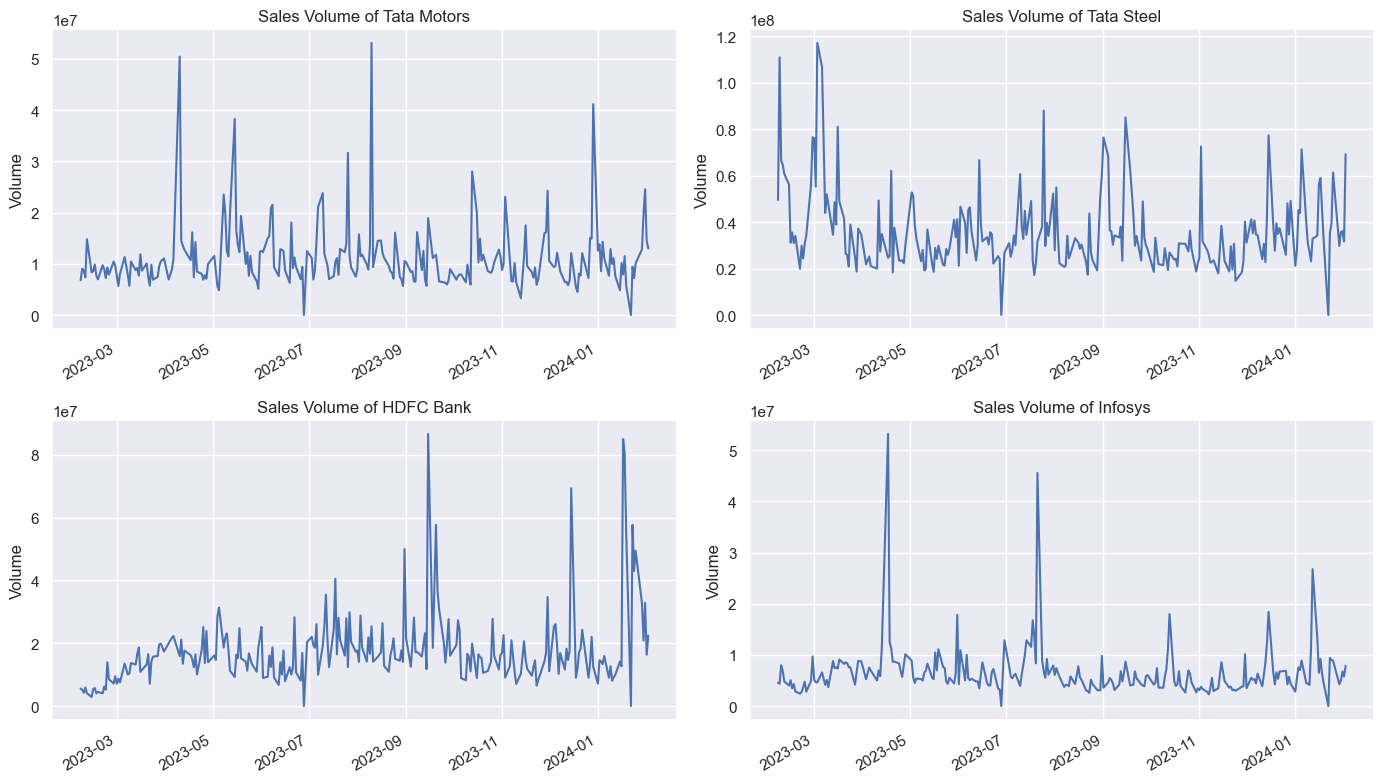

In [9]:
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):
    stock_df["Volume"].plot(ax=ax)
    ax.set_ylabel("Volume")
    ax.set_xlabel(None)
    ax.set_title(f"Sales Volume of {company_name}")

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

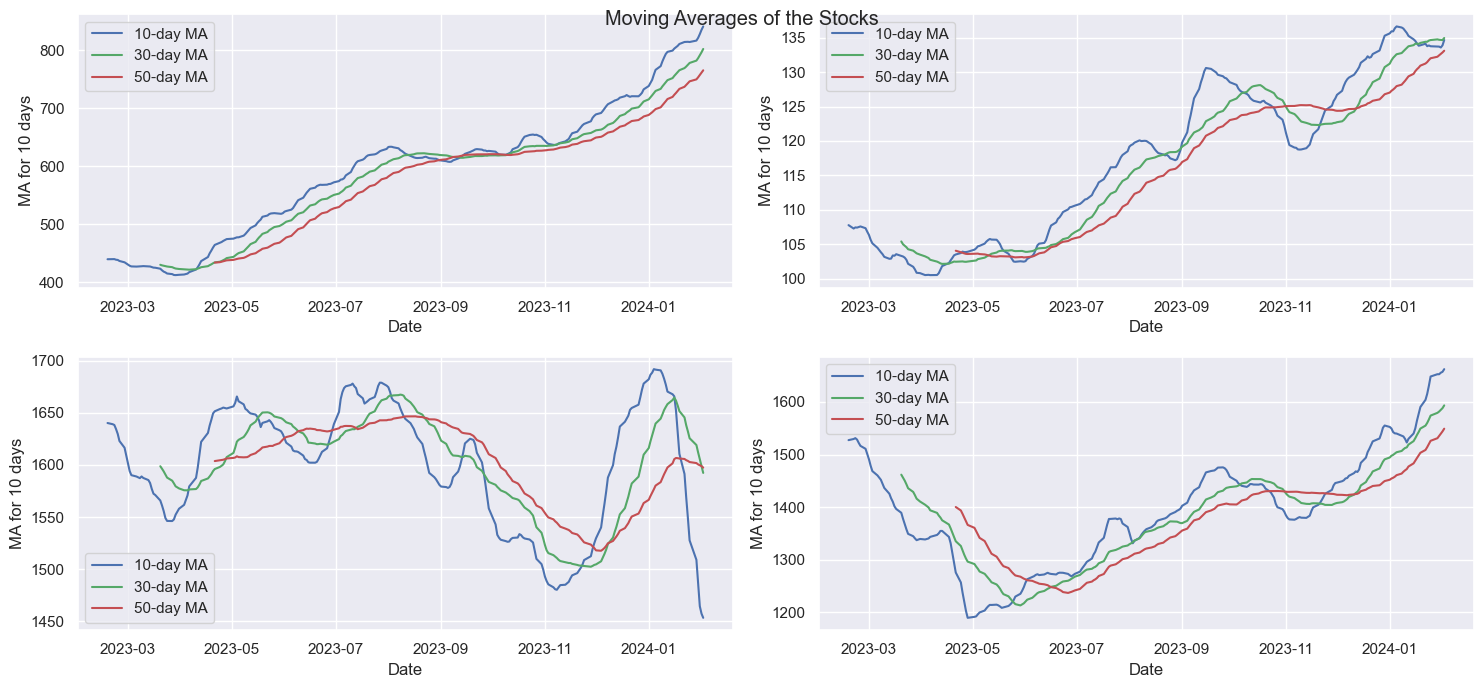

In [10]:
# Define the moving averages and line colors
moving_averages = [10, 30, 50]
line_colors = ['b', 'g', 'r']

# Create subplots
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):
    for ma, color in zip(moving_averages, line_colors):
        ma_col = f"MA for {ma} days"

        # Check if the column name exists in the DataFrame
        if "Close" in stock_df.columns:
            stock_df[ma_col] = stock_df["Close"].rolling(ma).mean()
            sns.lineplot(
                x=stock_df.index,
                y=stock_df[ma_col],
                data=stock_df,
                ax=ax,
                label=f"{ma}-day MA",
                color=color,
            )
        else:
            print(f"Closing price data not found for {company_name}")
            ax.set(
        title=f"Moving Averages of {company_name}",
        xlabel=None,
        ylabel="Moving Average",
    )

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.suptitle("Moving Averages of the Stocks")
plt.legend()
plt.show()

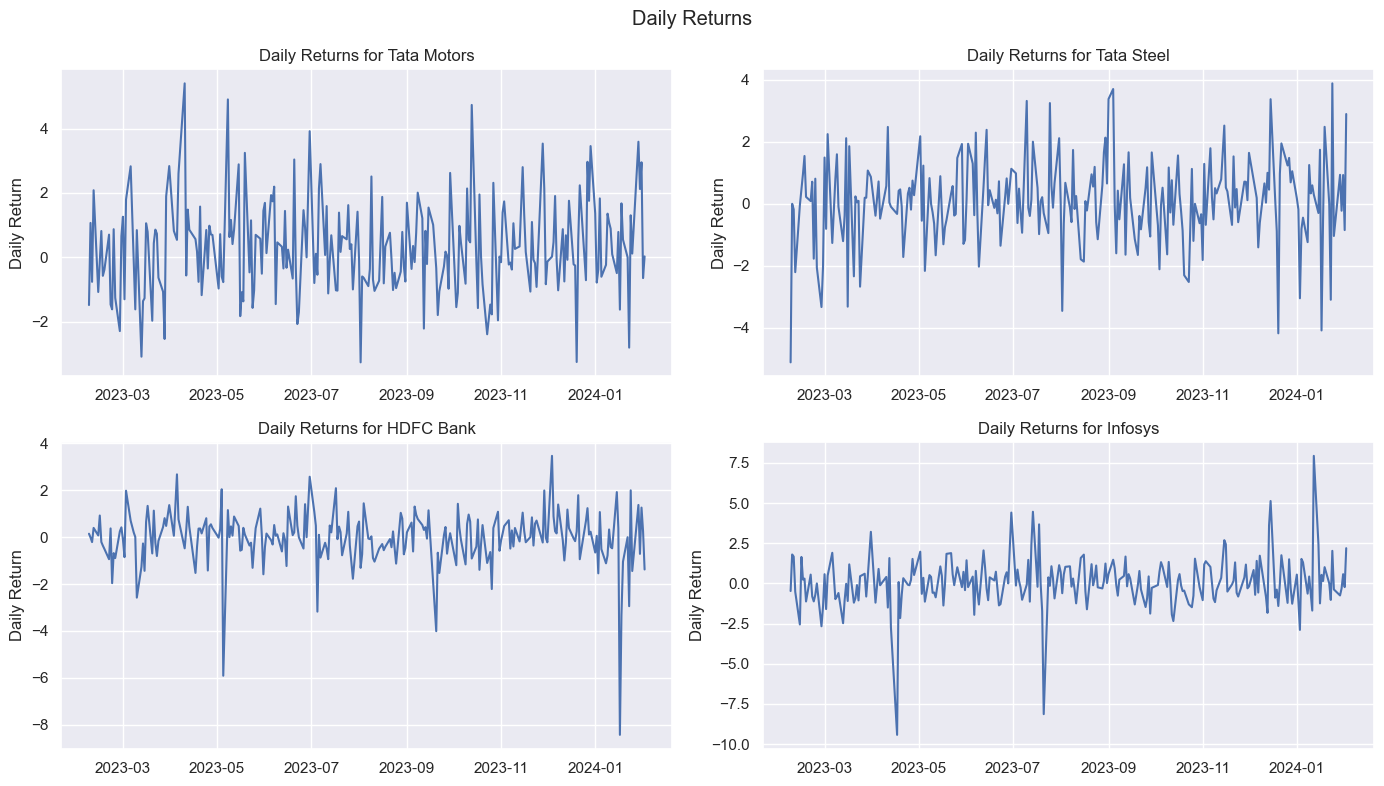

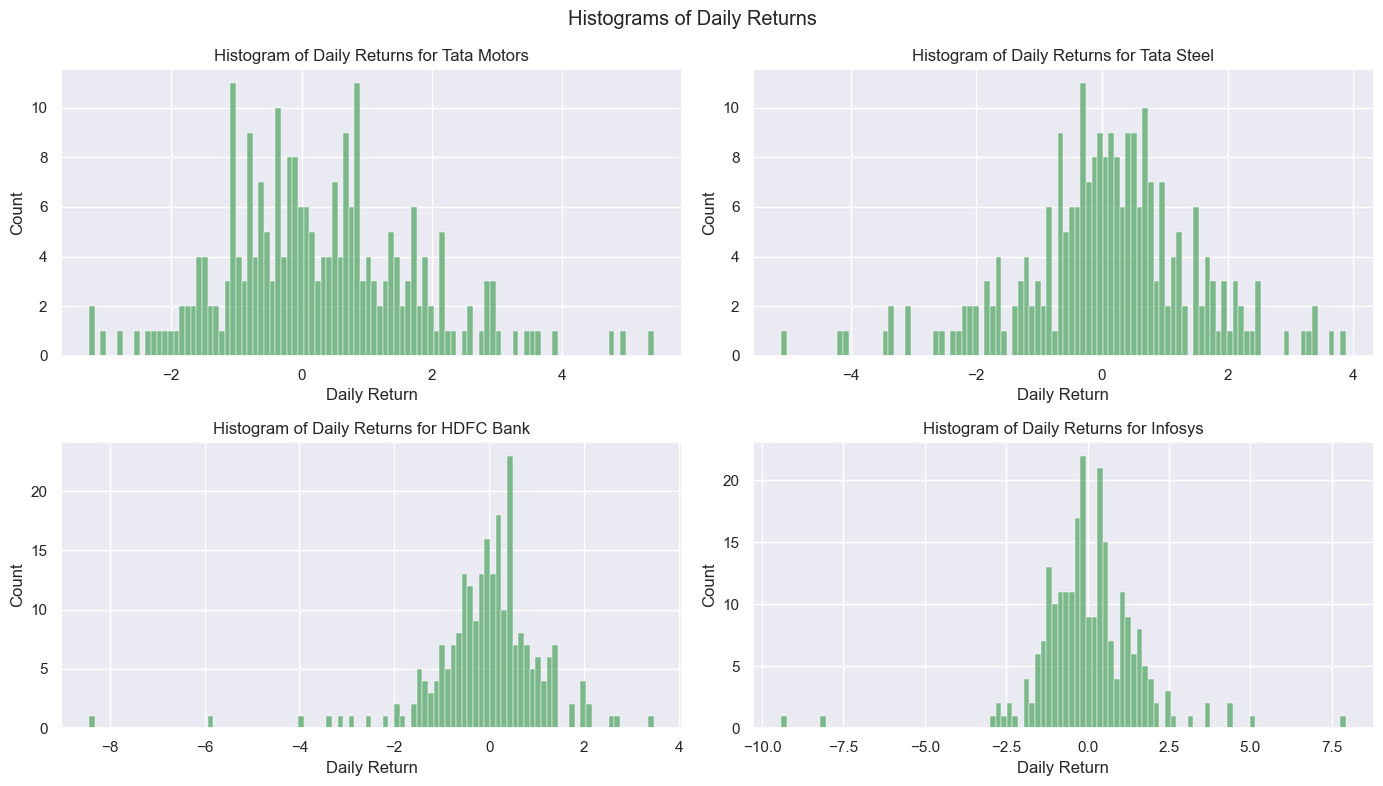

In [11]:
# daily returns for each stock
for stock_df in stock_dfs:
    stock_df["Daily Return"] = stock_df["Close"].pct_change() * 100  # Calculate daily returns in percentage

# subplots
plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, stock_df in enumerate(stock_dfs, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(
        x=stock_df.index,
        y="Daily Return",
        data=stock_df,
        color='b',
    )
    plt.title(f"Daily Returns for {company_names[i-1]}")
    plt.xlabel(None)
    plt.ylabel("Daily Return")

plt.suptitle("Daily Returns")
plt.tight_layout()

plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, stock_df in enumerate(stock_dfs, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        stock_df["Daily Return"].dropna(),
        bins=100,
        color='g',
    )
    plt.title(f"Histogram of Daily Returns for {company_names[i-1]}")

plt.suptitle("Histograms of Daily Returns")
plt.tight_layout()

plt.show()

# Correlation between different stocks & closing prices

In [15]:
# Create a DataFrame containing only the closing prices of Indian stocks
closing_df = data.pivot(columns='Company', values='Close')

# Print the closing prices DataFrame
print(closing_df.head())

Company                    HDFCBANK.NS      INFY.NS  TATAMOTORS.NS  \
Date                                                                 
2023-02-06 00:00:00+05:30  1633.022705  1508.935791     440.626709   
2023-02-07 00:00:00+05:30  1635.444824  1501.774902     434.097076   
2023-02-08 00:00:00+05:30  1635.247192  1528.784546     438.732605   
2023-02-09 00:00:00+05:30  1631.836304  1554.256348     435.393005   
2023-02-10 00:00:00+05:30  1638.312012  1546.134155     444.464752   

Company                    TATASTEEL.NS  
Date                                     
2023-02-06 00:00:00+05:30    113.737793  
2023-02-07 00:00:00+05:30    107.927437  
2023-02-08 00:00:00+05:30    107.927437  
2023-02-09 00:00:00+05:30    107.733757  
2023-02-10 00:00:00+05:30    105.361198  


In [16]:
pct_closing = closing_df.pct_change()
pct_closing

Company,HDFCBANK.NS,INFY.NS,TATAMOTORS.NS,TATASTEEL.NS
Date,,,,
2023-02-06 00:00:00+05:30,NaN,NaN,NaN,NaN
2023-02-07 00:00:00+05:30,0.001483,-0.004746,-0.014819,-0.051086
2023-02-08 00:00:00+05:30,-0.000121,0.017985,0.010679,0.000000
2023-02-09 00:00:00+05:30,-0.002086,0.016661,-0.007612,-0.001795
2023-02-10 00:00:00+05:30,0.003968,-0.005226,0.020836,-0.022022
...,...,...,...,...
2024-01-29 00:00:00+05:30,0.013764,-0.007489,0.035906,0.009346
2024-01-30 00:00:00+05:30,-0.007115,-0.003109,0.021225,-0.002222
2024-01-31 00:00:00+05:30,0.012636,0.005722,0.029516,0.009280


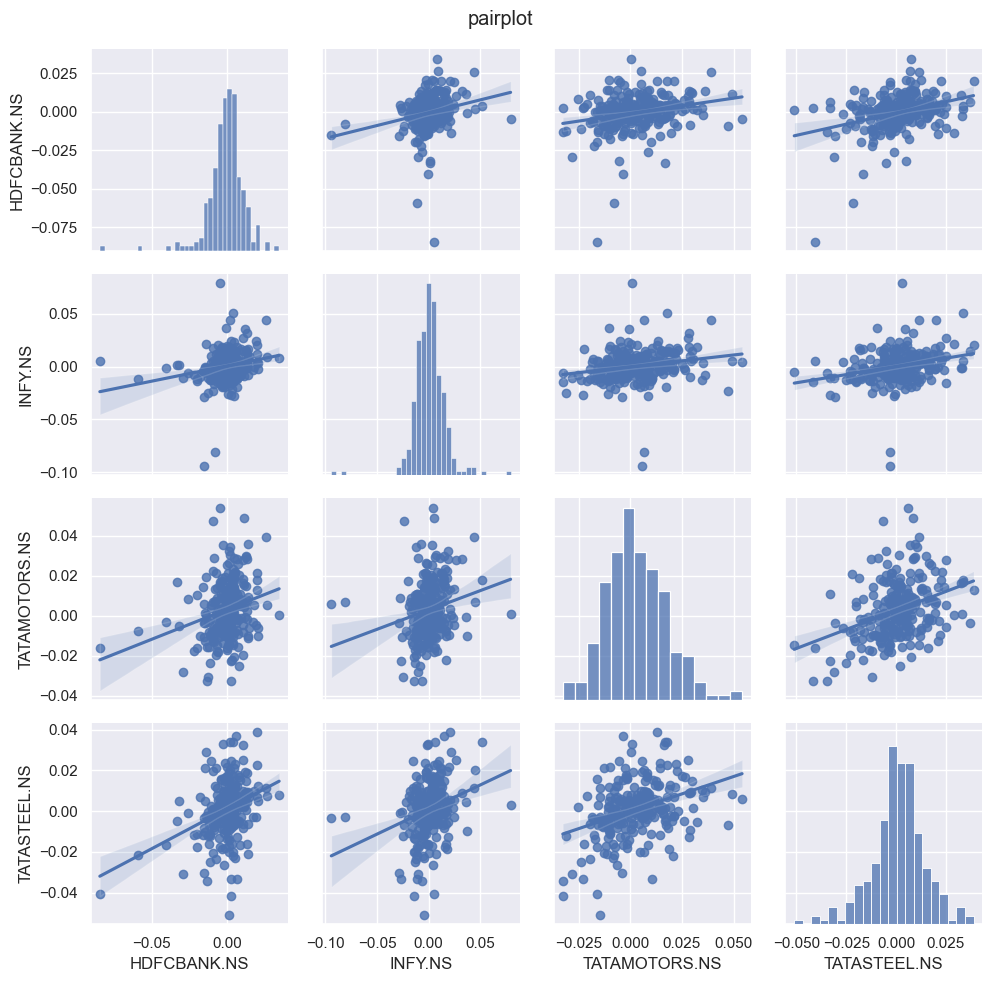

In [20]:
sns.pairplot(pct_closing, kind = "reg")
plt.suptitle("pairplot")
plt.tight_layout()

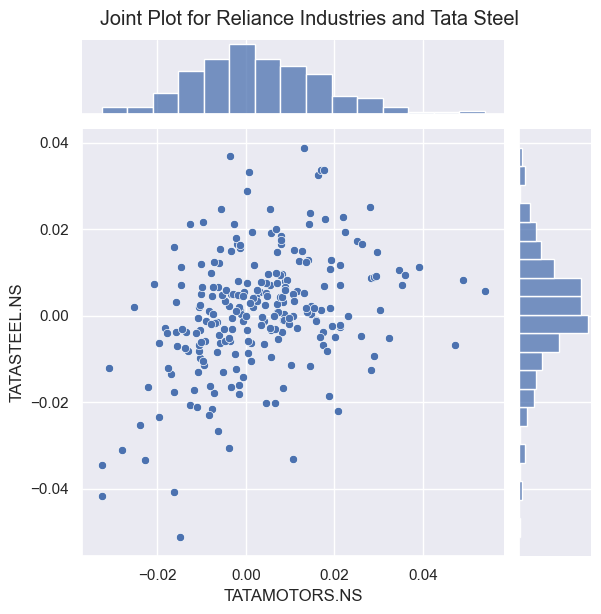

In [19]:
sns.jointplot(x=pct_closing["TATAMOTORS.NS"], y=pct_closing["TATASTEEL.NS"])
plt.suptitle("Joint Plot for Tata Motors Industries and Tata Steel", y=1.02)
plt.show()

<Axes: xlabel='Company', ylabel='Company'>

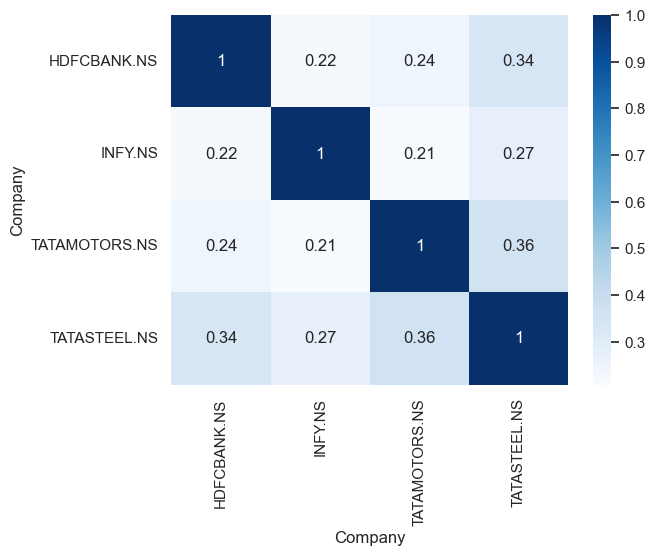

In [21]:
sns.heatmap(pct_closing.corr(), annot=  True, cmap = "Blues")

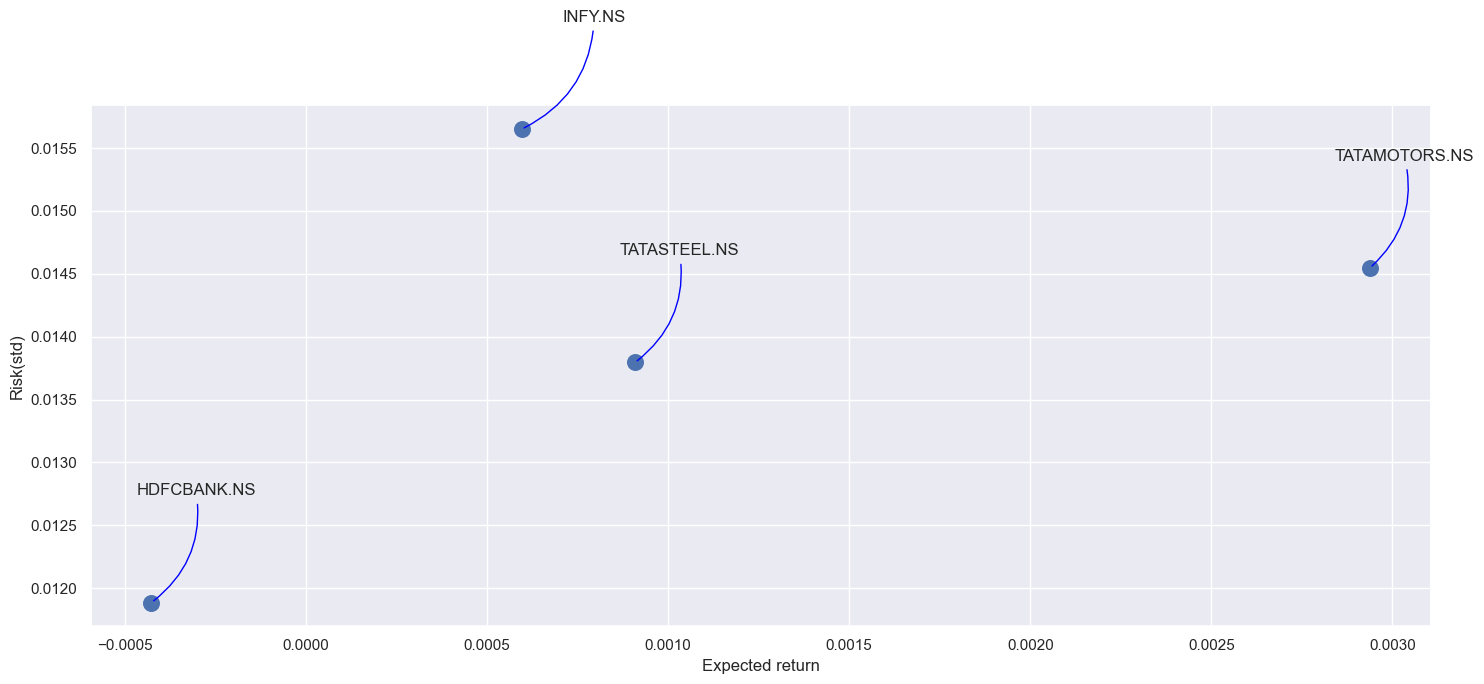

In [22]:
pct_closing = pct_closing.dropna()
area = np.pi * 40

plt.figure(figsize = (15, 7))
plt.scatter(pct_closing.mean(), pct_closing.std(), s = area)
plt.xlabel("Expected return")
plt.ylabel("Risk(std)")

for label, x, y in zip(
    pct_closing.columns,
    pct_closing.mean(),
    pct_closing.std()
):
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (75, 75),
        textcoords = "offset points",
        ha = "right",
        va = "bottom",
        arrowprops = dict(
            arrowstyle = '-',
            color = 'blue',
            connectionstyle = 'arc3,rad = -0.3'
        )
    )
    plt.tight_layout()

In [23]:
stock_symbol = 'RELIANCE.NS'
start_date = '2022-09-01'
end_date = datetime.now()

# Fetch data for Reliance using yfinance
df = yf.download(stock_symbol, start=start_date, end=end_date)

print(df)

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-09-01  2582.649902  2604.949951  2550.699951  2560.399902  2551.387207   
2022-09-02  2560.399902  2575.350098  2525.699951  2530.500000  2521.592529   
2022-09-05  2531.000000  2581.500000  2531.000000  2569.800049  2560.754395   
2022-09-06  2573.000000  2606.000000  2572.000000  2596.850098  2587.709229   
2022-09-07  2575.000000  2594.899902  2570.000000  2581.750000  2572.662109   
...                 ...          ...          ...          ...          ...   
2024-01-30  2919.899902  2919.949951  2808.850098  2815.250000  2815.250000   
2024-01-31  2808.000000  2868.500000  2805.000000  2853.250000  2853.250000   
2024-02-01  2870.000000  2886.699951  2836.100098  2853.300049  2853.300049   
2024-02-02  2866.350098  2949.800049  2866.350098  2915.399902  2915.399902   
2024-02-06  2883.699951  2883.699951  2852.199951  2

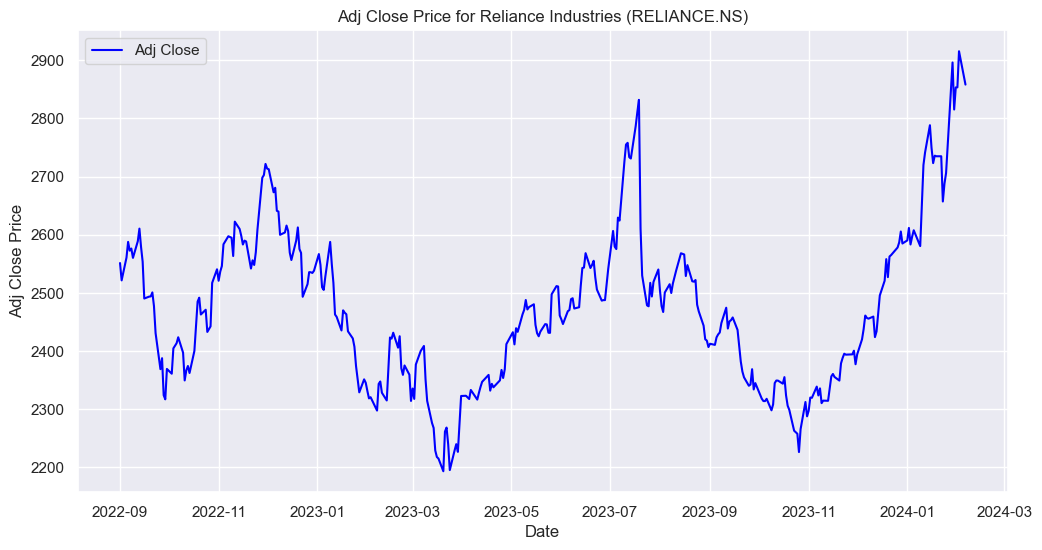

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.title('Adj Close Price for Reliance Industries (RELIANCE.NS)')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)

plt.show()

In [25]:
data = df.filter(["Close"])
dataset = data.values

training_data_len = int(
    np.ceil(len(dataset)* 0.95)
)
training_data_len

337

# LSTM are sensitive to the scale of the data so I applied minmax scaler

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

scaled_data

array([[0.50290548],
       [0.46103766],
       [0.51606819],
       [0.55394546],
       [0.53280131],
       [0.53791214],
       [0.51536806],
       [0.55562571],
       [0.58601142],
       [0.5420432 ],
       [0.50612616],
       [0.41720926],
       [0.42176012],
       [0.42232044],
       [0.43198214],
       [0.39886598],
       [0.33361343],
       [0.24658702],
       [0.27305192],
       [0.18371486],
       [0.1737031 ],
       [0.24714699],
       [0.2355948 ],
       [0.29678636],
       [0.30924894],
       [0.32360167],
       [0.28642453],
       [0.21935157],
       [0.24364633],
       [0.2542184 ],
       [0.23727505],
       [0.29055525],
       [0.35006656],
       [0.40978778],
       [0.41916984],
       [0.37856212],
       [0.39011431],
       [0.33648405],
       [0.3499264 ],
       [0.45494637],
       [0.48778288],
       [0.46012762],
       [0.48225156],
       [0.49555409],
       [0.54820423],
       [0.56759806],
       [0.56395723],
       [0.519

In [27]:
train_data = scaled_data[0: int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
"""    if i <= 61:
        print(x_train)
        print(y_train)
        print()"""

print(x_train[0])
print(y_train[0])

[0.50290548 0.46103766 0.51606819 0.55394546 0.53280131 0.53791214
 0.51536806 0.55562571 0.58601142 0.5420432  0.50612616 0.41720926
 0.42176012 0.42232044 0.43198214 0.39886598 0.33361343 0.24658702
 0.27305192 0.18371486 0.1737031  0.24714699 0.2355948  0.29678636
 0.30924894 0.32360167 0.28642453 0.21935157 0.24364633 0.2542184
 0.23727505 0.29055525 0.35006656 0.40978778 0.41916984 0.37856212
 0.39011431 0.33648405 0.3499264  0.45494637 0.48778288 0.46012762
 0.48225156 0.49555409 0.54820423 0.56759806 0.56395723 0.51984884
 0.6028847  0.5850313  0.56857818 0.54764426 0.55702598 0.5550654
 0.48960295 0.50941693 0.4982148  0.52909074 0.58300099 0.70895487]
0.7154659679921562


In [28]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(277, 60, 1)

# Creating the Stacked LSTM

In [29]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

model = Sequential()

# First LSTM layer with 16 units
model.add(LSTM(16, input_shape=(x_train.shape[1], 1), return_sequences=True))

# Second LSTM layer with 16 units and swish activation
model.add(LSTM(16, return_sequences=True, activation='swish'))

# Third LSTM layer with 16 units, no return sequences and swish activation
model.add(LSTM(16, return_sequences=False, activation='swish'))

# Output layer with swish activation
model.add(Dense(1, activation='swish'))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Fit the model to the data
model.fit(x_train, y_train, batch_size=50, epochs=52)




Epoch 1/52

6/6 [==============================] - 7s 131ms/step - loss: 0.1529
Epoch 2/52
6/6 [==============================] - 1s 107ms/step - loss: 0.1472
Epoch 3/52
6/6 [==============================] - 0s 79ms/step - loss: 0.1408
Epoch 4/52
6/6 [==============================] - 0s 77ms/step - loss: 0.1316
Epoch 5/52
6/6 [==============================] - 0s 78ms/step - loss: 0.1164
Epoch 6/52
6/6 [==============================] - 1s 106ms/step - loss: 0.0781
Epoch 7/52
6/6 [==============================] - 1s 100ms/step - loss: 0.0332
Epoch 8/52
6/6 [==============================] - 1s 112ms/step - loss: 0.0313
Epoch 9/52
6/6 [==============================] - 1s 112ms/step - loss: 0.0242
Epoch 10/52
6/6 [==============================] - 1s 110ms/step - loss: 0.0249
Epoch 11/52
6/6 [==============================] - 1s 82ms/step - loss: 0.0226
Epoch 12/52
6/6 [==============================] - 1s 100ms/step - loss: 0.0227
Epoch 13/52
6/6 [==============================] 

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 16)            1152      
                                                                 
 lstm_1 (LSTM)               (None, 60, 16)            2112      
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 5393 (21.07 KB)
Trainable params: 5393 (21.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [33]:
print(x_test[0])
print(y_test[0])

[0.20730949 0.19995809 0.215641   0.17188268 0.14688779 0.13701619
 0.08674643 0.07939503 0.03535672 0.09038725 0.15577962 0.12133293
 0.13463546 0.1665616  0.16586147 0.19288667 0.1716027  0.18854571
 0.15304917 0.15914012 0.15872032 0.21732125 0.22327238 0.21606115
 0.20737957 0.24875716 0.26177971 0.27200172 0.26976115 0.27046129
 0.27928303 0.24672684 0.27032147 0.30658823 0.33116297 0.36385932
 0.35818817 0.35636776 0.36140885 0.31197939 0.32584189 0.36812986
 0.41216851 0.44773513 0.49968515 0.45634663 0.50591626 0.50941693
 0.52762039 0.5399428  0.56612771 0.53728209 0.54470357 0.57473921
 0.53497179 0.55366514 0.56913815 0.54064293 0.53105097 0.62850964]
[2719.80004883]


In [34]:
x_test = np.array(x_test)
x_test = np.reshape(
    x_test,
    (x_test.shape[0], x_test.shape[1],1)
)

pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

rmse = np.sqrt(np.mean((pred - y_test)**2))

1/1 [==============================] - 1s 1s/step


In [35]:
rmse

155.91795694853585

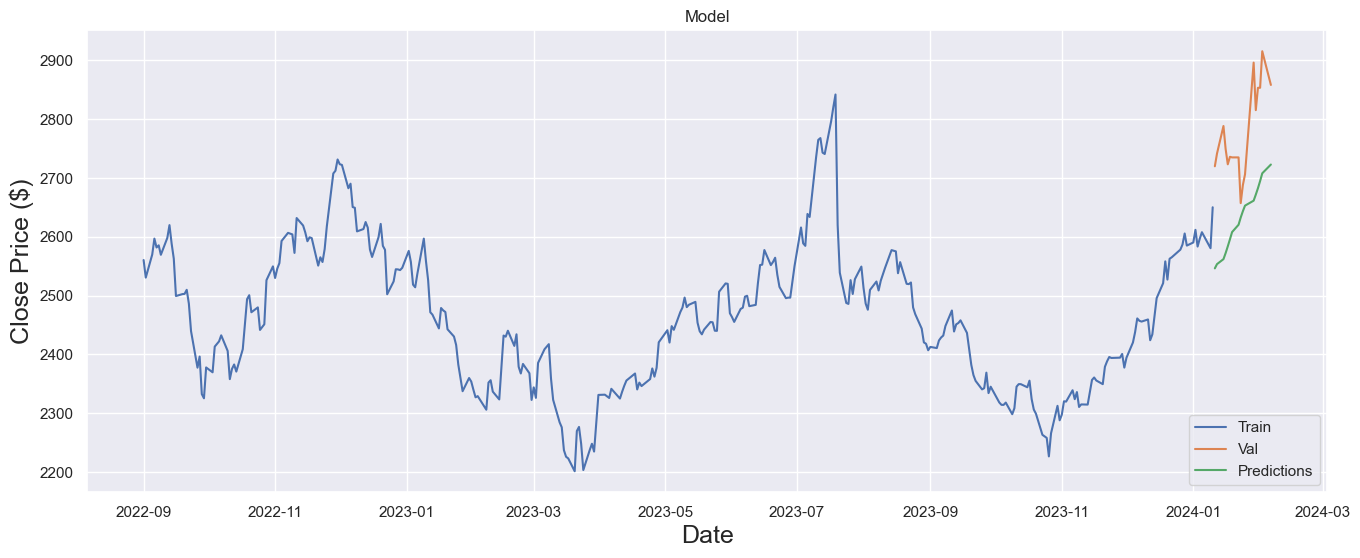

In [36]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = pred

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price ($)', fontsize = 18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()


Epoch 1/52
5/5 [==============================] - 2s 391ms/step - loss: 0.0141 - val_loss: 0.0135
Epoch 2/52
5/5 [==============================] - 0s 101ms/step - loss: 0.0139 - val_loss: 0.0125
Epoch 3/52
5/5 [==============================] - 0s 99ms/step - loss: 0.0137 - val_loss: 0.0120
Epoch 4/52
5/5 [==============================] - 0s 100ms/step - loss: 0.0136 - val_loss: 0.0123
Epoch 5/52
5/5 [==============================] - 0s 100ms/step - loss: 0.0136 - val_loss: 0.0127
Epoch 6/52
5/5 [==============================] - 1s 112ms/step - loss: 0.0133 - val_loss: 0.0112
Epoch 7/52
5/5 [==============================] - 0s 103ms/step - loss: 0.0135 - val_loss: 0.0120
Epoch 8/52
5/5 [==============================] - 0s 103ms/step - loss: 0.0132 - val_loss: 0.0121
Epoch 9/52
5/5 [==============================] - 0s 102ms/step - loss: 0.0130 - val_loss: 0.0104
Epoch 10/52
5/5 [==============================] - 1s 116ms/step - loss: 0.0132 - val_loss: 0.0117
Epoch 11/52
5/5 [===

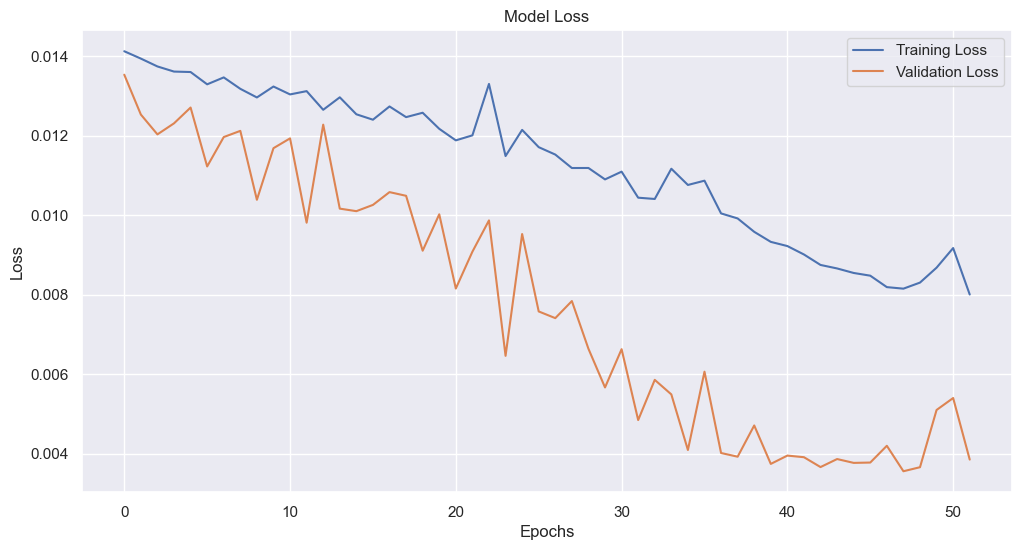

In [37]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, batch_size=50, epochs=52, validation_split=0.2)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# It's a regression problem, typically we don't have an accuracy metric.